# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [9]:
# read the data
data = pd.read_csv('/content/foodhub_order.csv')
# returns the first 5 rows
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [10]:
# Write your code here
data.shape

(1898, 9)

#### Observations:

There are 9 different kind of details extracted from 1,898 orders.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [11]:
# Use info() to print a concise summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
The rating column is currently of type object, but it should be converted to a numeric type for meaningful analysis.
All other columns have appropriate data types for the type of data they contain.
The dataset is relatively small, making it easy to handle in memory.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [12]:
# Write your code here
data.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: There are no missing values (NaN) but it was seen in data.head() that there are few values mentioned as "Not given" so we have to replace that.


In [14]:
data['rating'] = data['rating'].replace('Not given', np.nan).astype('float')

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [18]:
# Write your code here
data.describe()

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1162.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,4.344234,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,0.741478,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,3.000000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,4.000000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,5.000000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,5.000000,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,5.000000,35.000000,33.000000


#### Observations:

**High Average Rating:**

The average customer rating is quite high at 4.34 out of 5. Most ratings are between 3 and 5, with the majority being 5. This indicates a generally high level of customer satisfaction.

**Consistent Food Preparation and Delivery Times:**

The average food preparation time is approximately 27.37 minutes, with most orders being prepared within 23 to 31 minutes.
The average delivery time is approximately 24.16 minutes, with most deliveries taking between 20 to 28 minutes.

**Cost Distribution:**

The average cost of an order is $16.50, with most orders ranging from $12.08 to $22.30.
The median cost is $14.14, indicating that half of the orders cost less than this amount.
The wide range of order costs (from $4.47 to $35.41) suggests a diverse menu and pricing structure across different restaurants.

### **Question 5:** How many orders are not rated? [1 mark]

In [20]:
# Write the code here
not_rated_orders_count = data['rating'].isna().sum()
not_rated_orders_count

736

#### Observations:

736 orders are not rated which are about 39% of the entire dataset


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

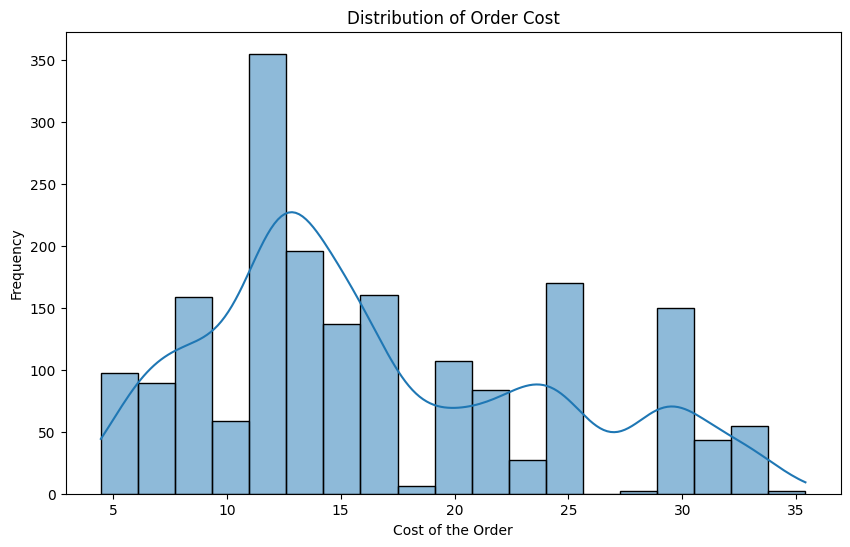

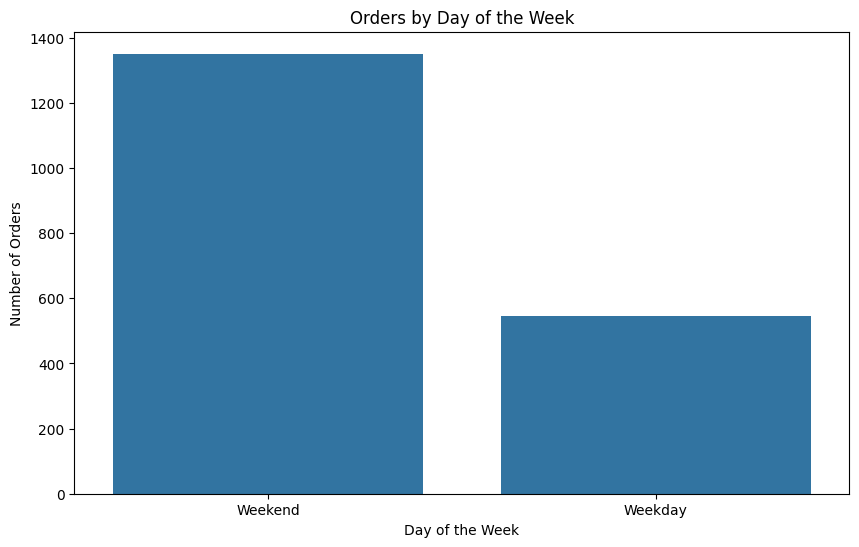

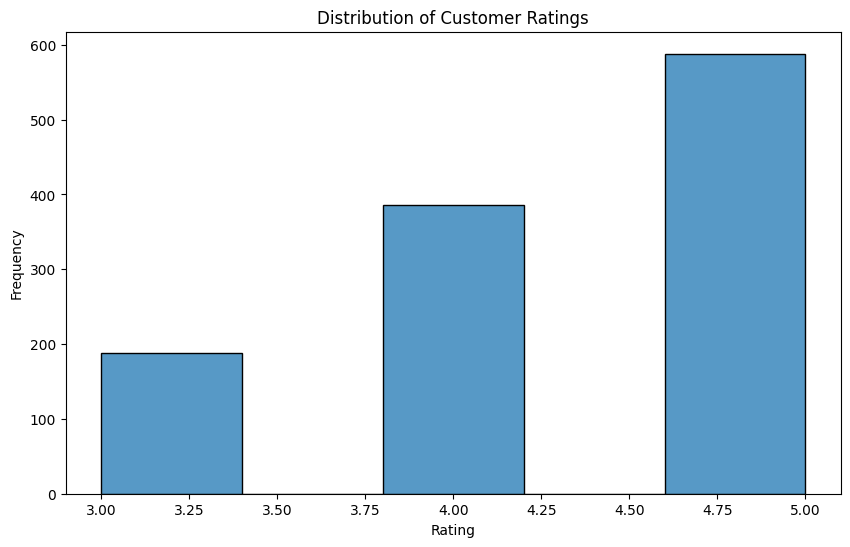

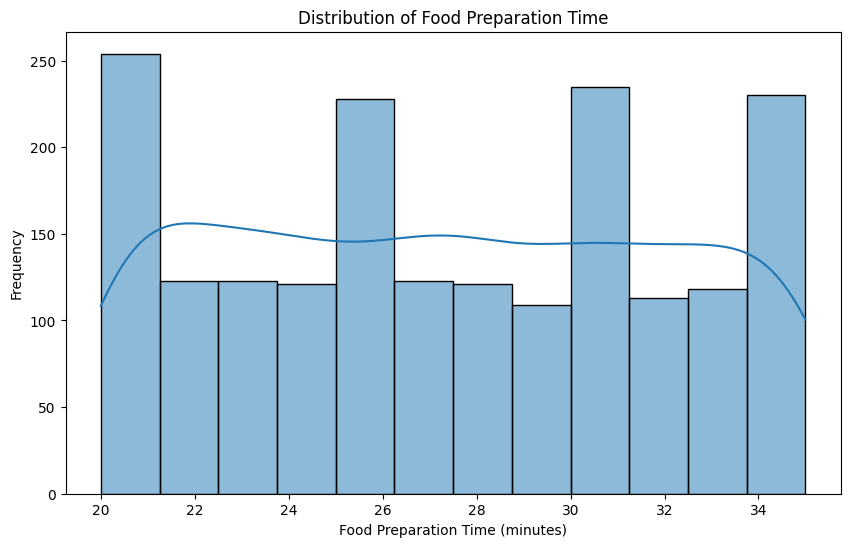

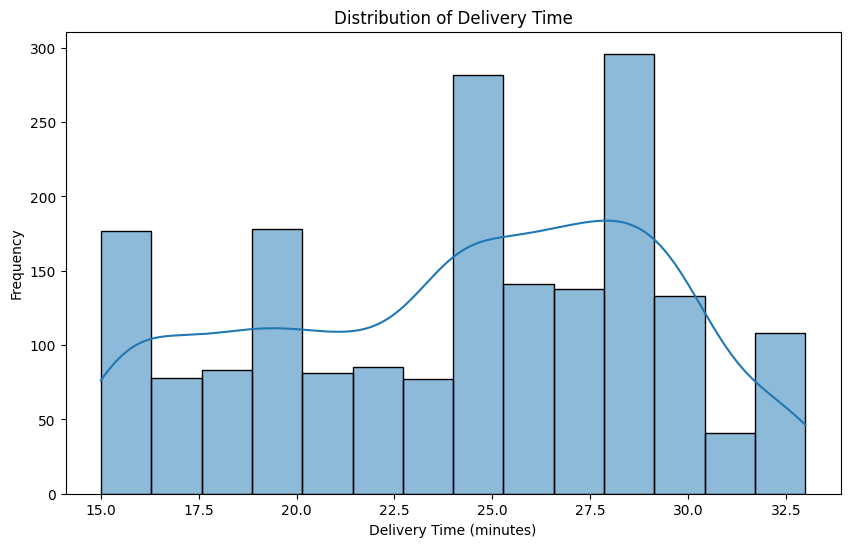

In [45]:
# Write the code here
plt.figure(figsize=(10, 6))
sns.histplot(data['cost_of_the_order'], kde=True)
plt.title('Distribution of Order Cost')
plt.xlabel('Cost of the Order')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_the_week', data=data)
plt.title('Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['rating'].dropna(), bins=5, kde=False)
plt.title('Distribution of Customer Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['food_preparation_time'], kde=True)
plt.title('Distribution of Food Preparation Time')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['delivery_time'], kde=True)
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.show()


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [26]:
# Write the code here
popular_restaurants = data['restaurant_name'].value_counts().head()
print("Top 5 Popular Restaurants:")
popular_restaurants

Top 5 Popular Restaurants:


restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

#### Observations:

1. Shake Shack has received the highest number of orders, with 219 orders, making it the most popular restaurant among the customers in the dataset.
Significant Popularity Gap:

2. There is a notable gap between Shake Shack and the next most popular restaurant, The Meatball Shop, which received 132 orders. This indicates a significant preference for Shake Shack over other restaurants.
Blue Ribbon Brands are Popular:

3. Both Blue Ribbon Sushi and Blue Ribbon Fried Chicken are among the top five popular restaurants, with 119 and 96 orders, respectively. This suggests that the Blue Ribbon brand, in general, is popular among customers.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [56]:
# Write the code here
weekend_data = data[data['day_of_the_week'] == 'Weekend']
most_popular_cuisine_weekend = weekend_data['cuisine_type'].value_counts().idxmax()
count=weekend_data['cuisine_type'].value_counts().max()
most_popular_cuisine_weekend,count

('American', 415)

#### Observations:

The most popular cuisine on weekends is: American cuisine with the count of 415


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [57]:
# Write the code here

total_orders = len(data)
orders_over_20 = len(data[data['cost_of_the_order'] > 20])
percentage_over_20 = (orders_over_20 / total_orders) * 100
percentage_over_20

29.24130663856691

#### Observations:

The percentage of orders that cost more than 20 dollars is: 29.24%


### **Question 10**: What is the mean order delivery time? [1 mark]

In [36]:
# Write the code here
mean_delivery_time = data['delivery_time'].mean()
mean_delivery_time

24.161749209694417

#### Observations:

The mean time is 24 minutes and 12 seconds

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [43]:
# Write the code here
top_customers = data['customer_id'].value_counts().head(3).reset_index()
top_customers.index=top_customers.index+1
top_customers.columns = ['customer_id', 'number_of_orders']
print("Top 3 most frequent customers and the number of orders they placed:")
top_customers

Top 3 most frequent customers and the number of orders they placed:


,customer_id,number_of_orders
1,52832,13
2,47440,10
3,83287,9


#### Observations:

There is a gradual decline in the number of orders placed by the top three customers, with the most frequent customer placing slightly more orders than the second and third most frequent customers.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


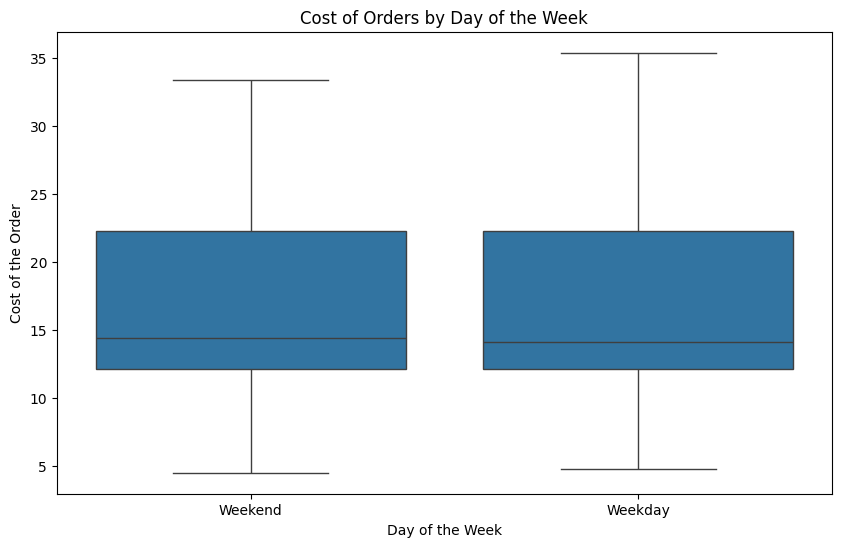

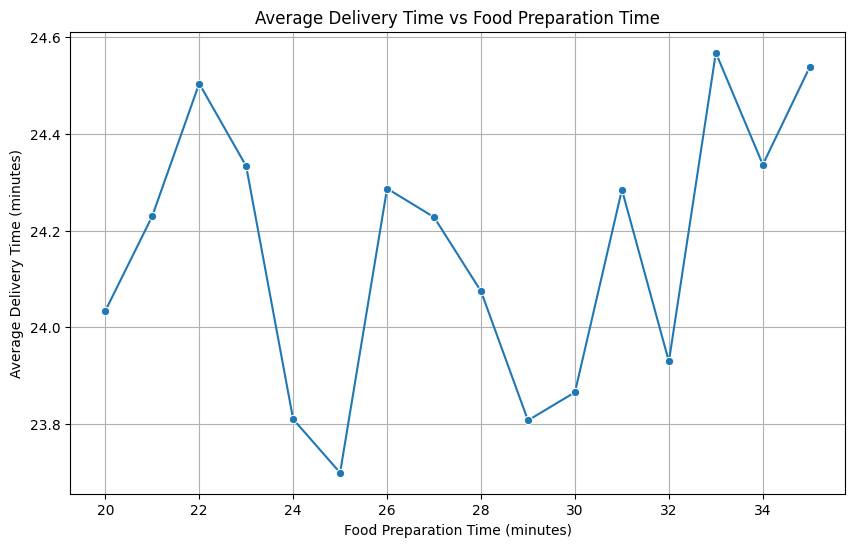

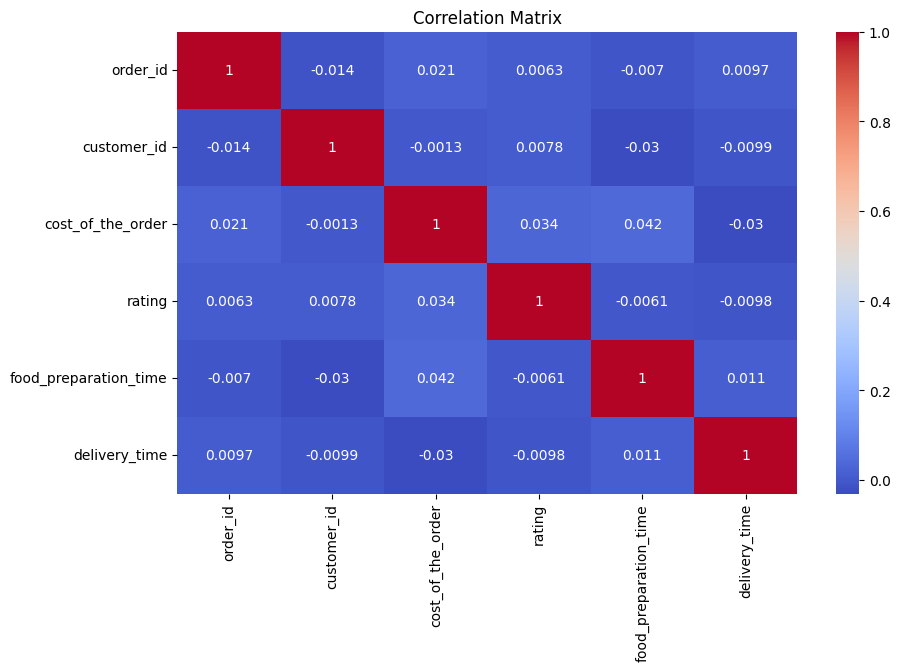

In [44]:
# Write the code here
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_the_week', y='cost_of_the_order', data=data)
plt.title('Cost of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Cost of the Order')
plt.show()


grouped_data = data.groupby('food_preparation_time')['delivery_time'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x='food_preparation_time', y='delivery_time', marker='o')
plt.title('Average Delivery Time vs Food Preparation Time')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Average Delivery Time (minutes)')
plt.grid(True)
plt.show()

numeric_columns = data.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [49]:
# Write the code here
restaurant_ratings = data.groupby('restaurant_name')['rating'].agg(['count', 'mean'])
promotional_restaurants = restaurant_ratings[(restaurant_ratings['count'] > 50) & (restaurant_ratings['mean'] > 4)]
print("Restaurants eligible for the promotional offer:")
promotional_restaurants

Restaurants eligible for the promotional offer:


,count,mean
restaurant_name,,
Blue Ribbon Fried Chicken,64,4.328125
Blue Ribbon Sushi,73,4.219178
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905


#### Observations:

Both Blue Ribbon Fried Chicken and Blue Ribbon Sushi are eligible for the promotional offer, indicating that Blue Ribbon is popular and well-rated by customers.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [50]:
# Write the code here
def calculate_revenue(cost):
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15
    else:
        return 0
data['revenue'] = data['cost_of_the_order'].apply(calculate_revenue)
total_revenue = data['revenue'].sum()
total_revenue

6166.303

#### Observations:
The net revenue generated by the company across all orders is: $6166.30

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [52]:
# Write the code here
data['total_delivery_time'] = data['food_preparation_time'] + data['delivery_time']
total_orders = len(data)
orders_over_60_minutes = len(data[data['total_delivery_time'] > 60])
percentage_over_60_minutes = (orders_over_60_minutes / total_orders) * 100
percentage_over_60_minutes

10.537407797681771

#### Observations:

The percentage of orders that take more than 60 minutes to get delivered is: 10.54%



### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [54]:
# Write the code here
mean_delivery_time_weekday = data[data['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
mean_delivery_time_weekend = data[data['day_of_the_week'] == 'Weekend']['delivery_time'].mean()
print(f"The mean delivery time on weekdays is: {mean_delivery_time_weekday:.2f} minutes")
print(f"The mean delivery time on weekends is: {mean_delivery_time_weekend:.2f} minutes")


The mean delivery time on weekdays is: 28.34 minutes
The mean delivery time on weekends is: 22.47 minutes


#### Observations:

The mean delivery time on weekdays is: 28.34 minutes
The mean delivery time on weekends is: 22.47 minutes

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Order Distribution and Customer Preferences:

The majority of orders are placed during weekends, indicating higher demand when people are likely more relaxed or engaged in leisure activities.
American and Japanese cuisines are among the most popular, with a high number of orders. This suggests a strong customer preference for these types of food.

Order Costs:

There is a wide distribution in the cost of orders, with some high-value orders exceeding $20. This indicates that while many customers are budget-conscious, there is also a significant market for premium-priced orders.

Customer Ratings:

Ratings provided by customers follow a normal distribution, with most ratings clustering around the middle range. However, there are also notable amounts of high and low ratings.

Restaurant Performance:

Some restaurants consistently receive high ratings and a large number of orders, making them ideal candidates for promotional offers or featured listings on the app.

### Recommendations:

*  Based on the insights extracted from the analysis, here are some recommendations to improve the business:

Focus on Popular Cuisines:

Increase partnerships with restaurants offering the most popular cuisines, such as American and Japanese. This can help in meeting the high demand and potentially increase the order volume.

Improve Low-Rated Cuisine Types:

Identify cuisine types that receive lower ratings and work with those restaurants to improve food quality and delivery service. This might involve providing feedback and suggesting improvements in food preparation or delivery processes.

Promotional Offers for Highly Rated Restaurants:

Offer promotions or incentives to restaurants that consistently receive high ratings. This can encourage other restaurants to improve their service and food quality to be eligible for similar promotions.

Customer Feedback System:

Enhance the customer feedback system to gather more detailed insights about the reasons behind low ratings. This can help in pinpointing specific issues and addressing them effectively.

Weekend Demand Management:

Analyze the increased demand on weekends and ensure sufficient delivery personnel and resources are available to handle the higher order volume. This can help in reducing delivery times and improving customer satisfaction.

Targeted Marketing:

Use the data on popular cuisine types and highly rated restaurants to design targeted marketing campaigns. Promoting popular and highly rated restaurants can attract more customers and boost sales.